In [775]:
import pandas as pd
import os
from textblob import TextBlob
from nltk.corpus import stopwords
import nltk
import re

In [776]:
# Download NLTK data (if not already downloaded)
#nltk.download("punkt")
#nltk.download("stopwords")

In [777]:
#setting path to directory
csv_directory = "C:/Users/annar/OneDrive/Desktop/Visual Studio/GitHub/Projects2/Insighter/Zomato_food_reviews/Data"
os.chdir(csv_directory)


In [778]:
# Load the CSV dataset
data = pd.read_csv("./csv_files/the_himalayan_cafe.csv")
data.head()

,Reviews
0,If you want bloating and uneasiness then this ...
1,the veg Schezwan fried rice tasted like it has...
2,noodles was bland in taste
3,paneer chilli is sweet
4,very less meat


In [779]:
#function to convert txt files to list
def converting_to_list(path):
    final_list = []
    # opening the file in read mode
    my_file = open(path, "r")

    # reading the file
    data = my_file.read()

    data_into_list = data.split("\n")
    for i in data_into_list:
        i = i.lower()
        final_list.append(i)

    return final_list
    my_file.close()

In [780]:
#function to find positive sentiment
def positive(words_list,text):
    if "not" in text:
        answer = "negative"
    elif any(map(lambda v: v in words_list, text)):
        answer = "positive"
    else:
        answer = 1
    return answer

In [781]:
#function to find negative sentiment
def negative_neutral(words_list,text):
    if any(map(lambda v: v in words_list, text)):
        answer = "negative"
    else:
        answer = "neutral"
    return answer

In [782]:
#Final function for analysis
def analyze_sentiment_based_on_criterion(text, criterion):
    text = text.lower()
    text = text.split()

    if criterion == "Taste of food":
        path = "./txt_files/word_bags/taste_of_food_good.txt"
        words_list = converting_to_list(path)

        path2 = "./txt_files/word_bags/taste_of_food_bad.txt"
        words_list2 = converting_to_list(path2)

        sentiment = positive(words_list,text)
        
        if sentiment == 1:
            new_sentiment = negative_neutral(words_list2,text)
            return new_sentiment
        else:
            return sentiment
    
    elif criterion == "Quality of food":
        path = "./txt_files/word_bags/quality_of_food_good.txt"
        words_list = converting_to_list(path)

        path2 = "./txt_files/word_bags/quality_of_food_bad.txt"
        words_list2 = converting_to_list(path2)

        sentiment = positive(words_list,text)
        
        if sentiment == 1:
            new_sentiment = negative_neutral(words_list2,text)
            return new_sentiment
        else:
            return sentiment
    
    elif criterion == "Quantity of food":
        path = "./txt_files/word_bags/quantity_of_food_good.txt"
        words_list = converting_to_list(path)

        path2 = "./txt_files/word_bags/quantity_of_food_bad.txt"
        words_list2 = converting_to_list(path2)

        sentiment = positive(words_list,text)
        
        if sentiment == 1:
            new_sentiment = negative_neutral(words_list2,text)
            return new_sentiment
        else:
            return sentiment
    
    elif criterion == "Location":
        path = "./txt_files/word_bags/location_good.txt"
        words_list = converting_to_list(path)

        path2 = "./txt_files/word_bags/location_bad.txt"
        words_list2 = converting_to_list(path2)

        sentiment = positive(words_list,text)
        
        if sentiment == 1:
            new_sentiment = negative_neutral(words_list2,text)
            return new_sentiment
        else:
            return sentiment
    
    elif criterion == "Delivery Service":
        path = "./txt_files/word_bags/delivery_service_good.txt"
        words_list = converting_to_list(path)

        path2 = "./txt_files/word_bags/delivery_service_bad.txt"
        words_list2 = converting_to_list(path2)

        sentiment = positive(words_list,text)
        
        if sentiment == 1:
            new_sentiment = negative_neutral(words_list2,text)
            return new_sentiment
        else:
            return sentiment
    
    elif criterion == "Packaging":
        path = "./txt_files/word_bags/packaging_good.txt"
        words_list = converting_to_list(path)

        path2 = "./txt_files/word_bags/packaging_bad.txt"
        words_list2 = converting_to_list(path2)

        sentiment = positive(words_list,text)
        
        if sentiment == 1:
            new_sentiment = negative_neutral(words_list2,text)
            return new_sentiment
        else:
            return sentiment
    
    elif criterion == "Health Factor":
        path = "./txt_files/word_bags/health_factor_good.txt"
        words_list = converting_to_list(path)

        path2 = "./txt_files/word_bags/health_factor_bad.txt"
        words_list2 = converting_to_list(path2)

        sentiment = positive(words_list,text)
        
        if sentiment == 1:
            new_sentiment = negative_neutral(words_list2,text)
            return new_sentiment
        else:
            return sentiment
    
    elif criterion == "Presentation":
        path = "./txt_files/word_bags/presentation_good.txt"
        words_list = converting_to_list(path)

        path2 = "./txt_files/word_bags/presentation_bad.txt"
        words_list2 = converting_to_list(path2)

        sentiment = positive(words_list,text)
        
        if sentiment == 1:
            new_sentiment = negative_neutral(words_list2,text)
            return new_sentiment
        else:
            return sentiment
    
    elif criterion == "Décor/ambience":
        path = "./txt_files/word_bags/decor_good.txt"
        words_list = converting_to_list(path)

        path2 = "./txt_files/word_bags/decor_bad.txt"
        words_list2 = converting_to_list(path2)

        sentiment = positive(words_list,text)
        
        if sentiment == 1:
            new_sentiment = negative_neutral(words_list2,text)
            return new_sentiment
        else:
            return sentiment

In [783]:
# Define the judging criteria
criteria = [
    "Taste of food",
    "Quality of food",
    "Quantity of food",
    "Location",
    "Delivery Service",
    "Packaging",
    "Health Factor",
    "Presentation",
    "Décor/ambience",
]

In [784]:
#cleaning text data
data["cleaned_review"] = data["Reviews"].apply(lambda x: re.sub(r"[^a-zA-Z0-9\s]", "", x).lower())
data.head()

,Reviews,cleaned_review
0,If you want bloating and uneasiness then this ...,if you want bloating and uneasiness then this ...
1,the veg Schezwan fried rice tasted like it has...,the veg schezwan fried rice tasted like it has...
2,noodles was bland in taste,noodles was bland in taste
3,paneer chilli is sweet,paneer chilli is sweet
4,very less meat,very less meat


In [785]:
#converting cleaned data to list
data_list = []

for i in range(len(data)):
    data_list.append(data.loc[i,"cleaned_review"])

In [786]:
#finding sentiments for all categories and keeping percentile score for analysis
results= {}
for criteria in criteria:
    sentiment_food = []
    for i in data_list:
        sentiment_food.append(analyze_sentiment_based_on_criterion(i, criteria))

    data[criteria] = pd.Series(sentiment_food)

    # Calculate the percentage of positive, neutral, and negative reviews
    sentiment_counts = data[criteria].value_counts(normalize=True) * 100
        
    # Store the results in the dictionary
    results[criteria] = {
        "Positive": sentiment_counts.get("positive", 0),
        "Neutral": sentiment_counts.get("neutral", 0),
        "Negative": sentiment_counts.get("negative", 0),
    }

In [787]:
results

{'Taste of food': {'Positive': 27.340823970037455,
  'Neutral': 53.68289637952559,
  'Negative': 18.976279650436954},
 'Quality of food': {'Positive': 12.484394506866417,
  'Neutral': 66.29213483146067,
  'Negative': 21.22347066167291},
 'Quantity of food': {'Positive': 7.740324594257178,
  'Neutral': 75.65543071161048,
  'Negative': 16.604244694132333},
 'Location': {'Positive': 16.479400749063668,
  'Neutral': 69.78776529338327,
  'Negative': 13.732833957553058},
 'Delivery Service': {'Positive': 3.870162297128589,
  'Neutral': 80.89887640449437,
  'Negative': 15.23096129837703},
 'Packaging': {'Positive': 2.871410736579276,
  'Neutral': 82.14731585518102,
  'Negative': 14.981273408239701},
 'Health Factor': {'Positive': 2.6217228464419478,
  'Neutral': 82.14731585518102,
  'Negative': 15.23096129837703},
 'Presentation': {'Positive': 1.373283395755306,
  'Neutral': 84.39450686641698,
  'Negative': 14.232209737827715},
 'Décor/ambience': {'Positive': 3.870162297128589,
  'Neutral': 8

In [788]:
data.head()

,Reviews,cleaned_review,Taste of food,Quality of food,Quantity of food,Location,Delivery Service,Packaging,Health Factor,Presentation,Décor/ambience
0,If you want bloating and uneasiness then this ...,if you want bloating and uneasiness then this ...,neutral,neutral,neutral,positive,neutral,neutral,negative,neutral,neutral
1,the veg Schezwan fried rice tasted like it has...,the veg schezwan fried rice tasted like it has...,negative,neutral,negative,neutral,neutral,neutral,neutral,neutral,neutral
2,noodles was bland in taste,noodles was bland in taste,negative,negative,neutral,neutral,neutral,neutral,neutral,negative,negative
3,paneer chilli is sweet,paneer chilli is sweet,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral
4,very less meat,very less meat,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral


In [789]:
#converting results into a nested dictionary to plot
plot_dict = {}
for criterion, sentiment_counts in results.items():
    plot_dict.update({criterion: sentiment_counts})

print(plot_dict)

{'Taste of food': {'Positive': 27.340823970037455, 'Neutral': 53.68289637952559, 'Negative': 18.976279650436954}, 'Quality of food': {'Positive': 12.484394506866417, 'Neutral': 66.29213483146067, 'Negative': 21.22347066167291}, 'Quantity of food': {'Positive': 7.740324594257178, 'Neutral': 75.65543071161048, 'Negative': 16.604244694132333}, 'Location': {'Positive': 16.479400749063668, 'Neutral': 69.78776529338327, 'Negative': 13.732833957553058}, 'Delivery Service': {'Positive': 3.870162297128589, 'Neutral': 80.89887640449437, 'Negative': 15.23096129837703}, 'Packaging': {'Positive': 2.871410736579276, 'Neutral': 82.14731585518102, 'Negative': 14.981273408239701}, 'Health Factor': {'Positive': 2.6217228464419478, 'Neutral': 82.14731585518102, 'Negative': 15.23096129837703}, 'Presentation': {'Positive': 1.373283395755306, 'Neutral': 84.39450686641698, 'Negative': 14.232209737827715}, 'Décor/ambience': {'Positive': 3.870162297128589, 'Neutral': 81.39825218476904, 'Negative': 14.731585518

In [790]:
#function to plot the sentiments
import matplotlib.pyplot as plt
import numpy as np

def plotting(plot_dict):
    categories = list(plot_dict.keys())
    sentiments = ['Positive', 'Neutral', 'Negative']
    num_categories = len(categories)
    width = 0.2

    fig, ax = plt.subplots()

    for i, sentiment in enumerate(sentiments):
        x = np.arange(len(categories)) + i * width
        y = [plot_dict[category][sentiment] for category in categories]
        ax.bar(x, y, width, label=sentiment)

    ax.set_ylabel('Percentage (%)')
    ax.set_title('Sentiment Analysis for Cafepress N Spinh')
    ax.set_xticks(np.arange(len(categories)) + width * (len(sentiments) - 1) / 2)
    ax.set_xticklabels(categories, rotation=45, ha='right')  # Corrected x-axis tick labels
    ax.legend(title='Sentiments')

    plt.tight_layout()


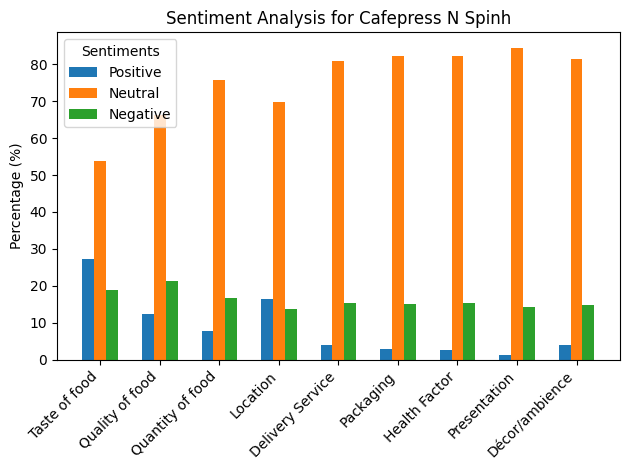

In [791]:
plotting(plot_dict)